In [2]:
import zipfile

with zipfile.ZipFile('US_Accidents_March23.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('.')  


In [3]:
import os
print(os.listdir())



['.ipynb_checkpoints', 'Untitled.ipynb', 'US_Accidents_March23.csv', 'US_Accidents_March23.csv.zip']


In [6]:
import pandas as pd

df = pd.read_csv('US_Accidents_March23.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:

df.info()


missing = df.isnull().sum().sort_values(ascending=False).head(15)
print(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour


C:\Users\mishr\AppData\Local\Temp\ipykernel_33664\2601814299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


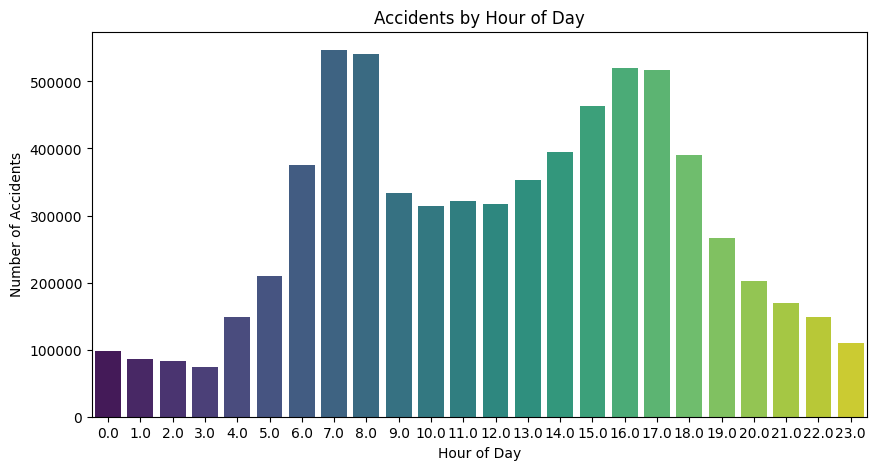

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()


C:\Users\mishr\AppData\Local\Temp\ipykernel_33664\121391587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')


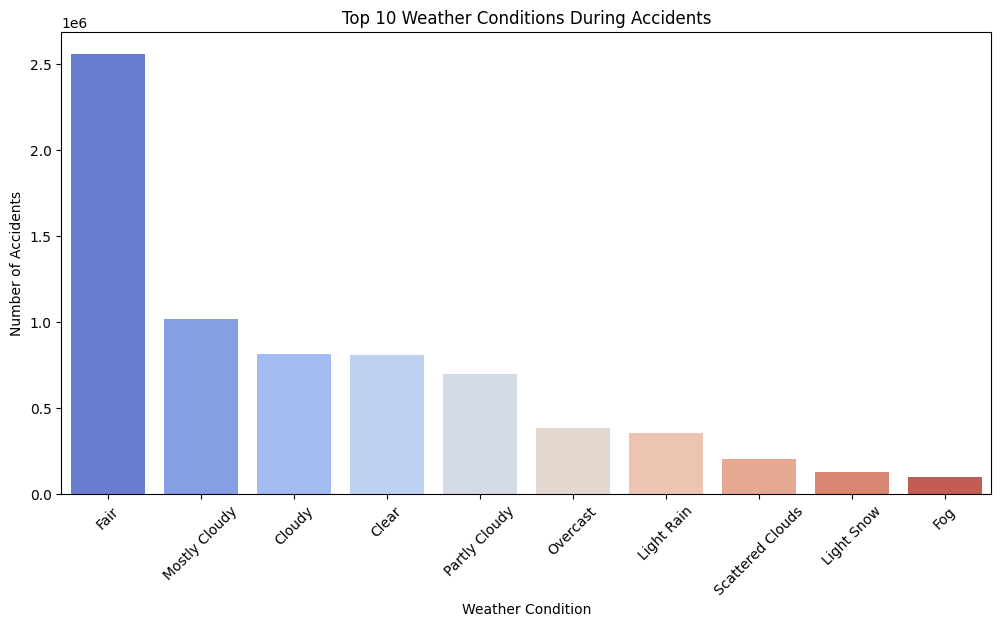

In [10]:
plt.figure(figsize=(12,6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


C:\Users\mishr\AppData\Local\Temp\ipykernel_33664\1215085114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='mako')


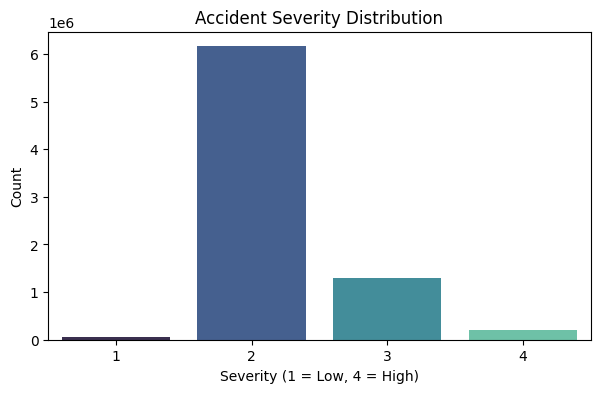

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x='Severity', data=df, palette='mako')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity (1 = Low, 4 = High)")
plt.ylabel("Count")
plt.show()


C:\Users\mishr\AppData\Local\Temp\ipykernel_33664\2825688323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


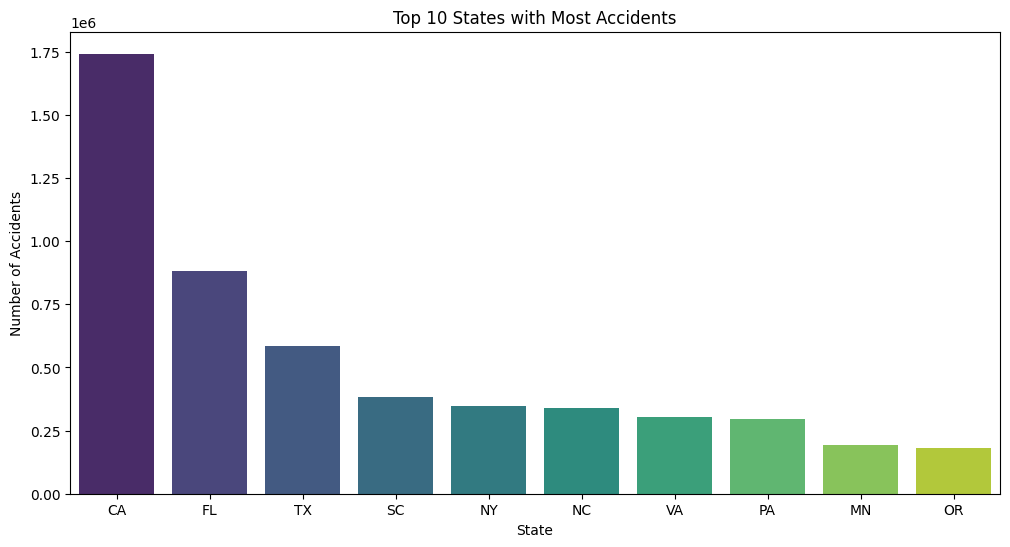

In [12]:
plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()


In [13]:
!pip install folium



   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



In [17]:
import folium
from folium.plugins import HeatMap


base_map = folium.Map(location=[39.50, -98.35], zoom_start=4)


sample_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=42)


HeatMap(data=sample_data).add_to(base_map)


base_map


In [15]:
from IPython.display import Markdown

Markdown("""
### 🚦 Project Summary

- The dataset contains detailed records of US traffic accidents from 2016 to 2023.
- Most accidents occur during rush hours (7-9 AM, 4-6 PM).
- Clear and cloudy weather have the highest accident counts, possibly due to traffic volume.
- Severity 2 accidents are the most common.
- States like California, Texas, and Florida report the highest number of accidents.
- Heatmap visualization reveals concentrated accident hotspots around major metropolitan areas.
- This analysis can help local authorities and drivers understand risk patterns and improve road safety measures.

---
""")



### 🚦 Project Summary

- The dataset contains detailed records of US traffic accidents from 2016 to 2023.
- Most accidents occur during rush hours (7-9 AM, 4-6 PM).
- Clear and cloudy weather have the highest accident counts, possibly due to traffic volume.
- Severity 2 accidents are the most common.
- States like California, Texas, and Florida report the highest number of accidents.
- Heatmap visualization reveals concentrated accident hotspots around major metropolitan areas.
- This analysis can help local authorities and drivers understand risk patterns and improve road safety measures.

---
